## Importação dos dados

In [6]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv',sep=';')
df.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Transformações

In [9]:
df['SUM_BILL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']   
df['AVG_BILL'] = df['SUM_BILL'] / 6
df['max_BILL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].max(axis=1)

df['SUM_PAY'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']
df['AVG_PAY'] = df['SUM_PAY'] / 6
df['max_PAY'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].max(axis=1)

## Divisão do conjunto de dados

In [10]:
OOT = df.loc[df['SAFRA'] >= 200605 ]
OOT['SAFRA'].groupby(OOT['SAFRA']).count()

SAFRA
200605    3000
200606    3000
200607    3000
Name: SAFRA, dtype: int64

In [11]:
DEV = df.loc[df['SAFRA'] < 200605 ]
DEV['SAFRA'].groupby(DEV['SAFRA']).count()

SAFRA
200510    3000
200511    3000
200512    3000
200601    3000
200602    3000
200603    3000
200604    3000
Name: SAFRA, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DEV.drop(columns=['default']), DEV['default'] ,test_size=0.3, random_state=123)

In [ ]:
X_train['SAFRA'].groupby(X_train['SAFRA']).count()

SAFRA
200510    2103
200511    2124
200512    2110
200601    2081
200602    2075
200603    2102
200604    2105
Name: SAFRA, dtype: int64

In [ ]:
X_test['SAFRA'].groupby(X_test['SAFRA']).count()

SAFRA
200510    897
200511    876
200512    890
200601    919
200602    925
200603    898
200604    895
Name: SAFRA, dtype: int64

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Curso_Logistica/X_train.csv')

## Análise Descritiva e Exploratória

In [ ]:
## Intalação do Pandas Profilling: https://github.com/pandas-profiling/pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train,minimal=True)

In [ ]:
profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva.html")

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
X_train.loc[X_train['BILL_AMT1'] < 0, 'BILL_AMT1'] = -1
X_train.loc[X_train['BILL_AMT2'] < 0, 'BILL_AMT2'] = -1
X_train.loc[X_train['BILL_AMT3'] < 0, 'BILL_AMT3'] = -1
X_train.loc[X_train['BILL_AMT4'] < 0, 'BILL_AMT4'] = -1
X_train.loc[X_train['BILL_AMT5'] < 0, 'BILL_AMT5'] = -1
X_train.loc[X_train['BILL_AMT6'] < 0, 'BILL_AMT6'] = -1


In [14]:
X_train['BILL_AMT2'].describe()

count     14700.000000
mean      47800.835102
std       68385.272659
min          -1.000000
25%        3158.500000
50%       21085.500000
75%       62051.250000
max      646770.000000
Name: BILL_AMT2, dtype: float64

In [15]:
X_train.loc[X_train['PAY_AMT1'] > 18006.25 , 'PAY_AMT1'] = 18006.25
X_train.loc[X_train['PAY_AMT2'] > 18987.5  , 'PAY_AMT2'] = 18987.5
X_train.loc[X_train['PAY_AMT3'] > 	15500.7 , 'PAY_AMT3'] = 	15500.7
X_train.loc[X_train['PAY_AMT4'] > 	15150.9 , 'PAY_AMT4'] = 	15150.9
X_train.loc[X_train['PAY_AMT5'] > 15620.05 , 'PAY_AMT5'] = 15620.05
X_train.loc[X_train['PAY_AMT6'] > 16992.4 , 'PAY_AMT6'] = 16992.4


In [ ]:
X_train['PAY_AMT5'].describe()

count    14700.000000
mean      3083.597194
std       4103.976382
min          0.000000
25%        247.750000
50%       1500.000000
75%       4000.000000
max      15620.050000
Name: PAY_AMT5, dtype: float64

In [ ]:
profile = ProfileReport(X_train,minimal=True)
profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva2.html")

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
X_train_trat = X_train.copy()

In [ ]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


## Avaliação da relevância e redundância dos atributos

In [ ]:
## Instalação do optbinning: http://gnpalencia.org/optbinning/installation.html
#! pip install optbinning

In [ ]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [ ]:
X_train_trat.set_index(['ID','SAFRA'],inplace=True)

In [ ]:
X_train_trat.head()

,,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
ID,SAFRA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


In [ ]:
X_train_trat.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY'],
      dtype='object')

In [ ]:
variable_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']
variable_names

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SUM_BILL',
 'AVG_BILL',
 'max_BILL',
 'SUM_PAY',
 'AVG_PAY',
 'max_PAY']

In [ ]:
categorical_variables = [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_variables

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [ ]:
binning_process  = BinningProcess(variable_names,categorical_variables=categorical_variables,min_prebin_size = 0.1,max_n_bins=3)

In [ ]:
binning_process.fit(X_train_trat, y_train)

BinningProcess(binning_fit_params=None, binning_transform_params=None,
               categorical_variables=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                      'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                      'PAY_6'],
               max_bin_size=None, max_n_bins=3, max_n_prebins=20,
               max_pvalue=None, max_pvalue_policy='consecutive',
               min_bin_size=None, min_n_bins=None, min_prebin_size=0.1,
               n_jobs=None, selection_criteria...None,
               split_digits=None,
               variable_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                               'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                               'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                               'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                               'PAY_AMT4', 'PAY_AMT5', 'PAY_A

In [ ]:
binning_process.summary().sort_values(by=['iv'], ascending=False)

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
5,PAY_0,categorical,OPTIMAL,True,3,0.850967,0.0955828,0.401391,0.171401
6,PAY_2,categorical,OPTIMAL,True,3,0.536533,0.0628168,0.307276,0.481239
7,PAY_3,categorical,OPTIMAL,True,3,0.389394,0.0461675,0.253835,0.529777
9,PAY_5,categorical,OPTIMAL,True,3,0.329166,0.0384737,0.214578,0.552183
8,PAY_4,categorical,OPTIMAL,True,3,0.324249,0.0382327,0.217414,0.549124
10,PAY_6,categorical,OPTIMAL,True,3,0.27638,0.0327123,0.198881,0.527896
17,PAY_AMT1,numerical,OPTIMAL,True,3,0.189392,0.0232568,0.222782,0.524348
27,AVG_PAY,numerical,OPTIMAL,True,3,0.183768,0.022537,0.213748,0.508916
26,SUM_PAY,numerical,OPTIMAL,True,3,0.183768,0.022537,0.213748,0.508916
28,max_PAY,numerical,OPTIMAL,True,3,0.142996,0.017606,0.189637,0.419561


### Salvar o objeto

In [ ]:
import pickle

with open('/content/drive/MyDrive/Curso_Logistica/binning_process.pickle', 'wb') as handle:
    pickle.dump(binning_process, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#with open('/content/drive/MyDrive/Curso_Logistica/binning_process.pickle', 'rb') as handle:
#  binning_process = pickle.load(handle)

In [ ]:
X_train_transf = binning_process.transform(X_train_trat,metric='event_rate')

In [ ]:
y = y_train.reset_index()

In [ ]:
y.head()

,index,default
0,10910,1
1,12563,0
2,369,1
3,7702,0
4,7464,0


### Avaliar determinada variável

In [ ]:
optb = binning_process.get_binned_variable("PAY_0")

In [ ]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, -2, -1]",11207,0.762381,9605,1602,0.142946,0.581567,0.217566,0.026819
1,[1],1868,0.127075,1217,651,0.348501,-0.583829,0.049758,0.006133
2,"[6, 5, 8, 4, 2, 3, 7]",1625,0.110544,500,1125,0.692308,-2.02039,0.583642,0.062631
3,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,14700,1.000000,11322,3378,0.229796,,0.850967,0.095583


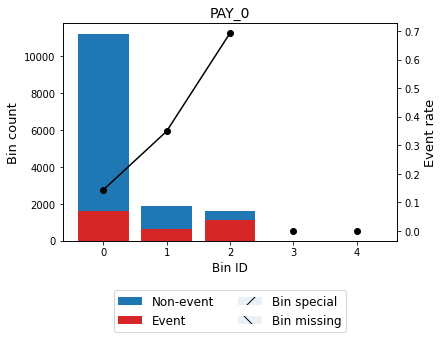

In [ ]:
optb.binning_table.plot(metric="event_rate")

In [ ]:
profile = ProfileReport(X_train_transf)

In [ ]:
profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva2.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X_train_transf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,"[205000.00, 305000.00)",[2],[2],[1 3],"[48.50, inf)",[ 0 -2],[8 0],[0],[0],[0],[0],"[109851.00, inf)","[87864.00, inf)","[75959.00, inf)","[16645.00, inf)","[16473.50, inf)","[16940.50, inf)","[4902.50, 9287.00)","[4966.50, 9895.00)","[4735.50, 8447.50)","[4152.00, 7510.00)","[3997.50, 8992.00)","[3781.00, 7714.50)","[290629.00, inf)","[48438.17, inf)","[75819.50, inf)","[23837.00, 60701.50)","[3972.83, 10116.92)","[4873.50, 9031.00)"
1,"[205000.00, 305000.00)",[2],[0 4 6 5 1],[0 2],"[30.50, 35.50)",[ 0 -2],[8 0],[0],[-1],[-1],[-1],"[781.50, 35193.00)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[-inf, 399.50)","[21.50, 1826.50)","[1602.50, 4966.50)","[1.50, 810.50)","[11.50, 1900.50)","[-inf, 0.50)","[-inf, 2.50)","[8633.00, 189263.00)","[1438.83, 31543.83)","[2984.50, 35558.00)","[3642.50, 7108.50)","[607.08, 1184.75)","[1215.50, 2723.00)"
2,"[-inf, 45000.00)",[2],[2],[1 3],"[30.50, 35.50)",[6 5 8 4 2 3 7],[4 2 7 3 5 6],[0],[0],[0],[0],"[781.50, 35193.00)","[11880.50, 21356.50)","[12238.00, 20040.50)","[8438.00, 16645.00)","[8150.50, 16473.50)","[5865.00, 16940.50)","[-inf, 21.50)","[91.00, 1602.50)","[1.50, 810.50)","[11.50, 1900.50)","[0.50, 716.00)","[2.50, 941.50)","[8633.00, 189263.00)","[1438.83, 31543.83)","[2984.50, 35558.00)","[-inf, 3642.50)","[-inf, 607.08)","[-inf, 1215.50)"
3,"[305000.00, inf)",[1],[3],[0 2],"[35.50, 41.50)",[-1],[ 1 -1],[-1],[-1],[-1],[-1],"[781.50, 35193.00)","[-inf, 11880.50)","[-inf, 12238.00)","[2509.00, 8438.00)","[1326.50, 8150.50)","[5865.00, 16940.50)","[21.50, 1826.50)","[1602.50, 4966.50)","[810.50, 2918.50)","[1900.50, 2851.50)","[3997.50, 8992.00)","[2.50, 941.50)","[8633.00, 189263.00)","[1438.83, 31543.83)","[2984.50, 35558.00)","[13302.50, 23837.00)","[2217.08, 3972.83)","[4873.50, 9031.00)"
4,"[75000.00, 125000.00)",[2],[2],[0 2],"[-inf, 25.50)",[ 0 -2],[8 0],[0],[-1],[-1],[-1],"[781.50, 35193.00)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[399.50, 5865.00)","[21.50, 1826.50)","[-inf, 91.00)","[1.50, 810.50)","[-inf, 11.50)","[716.00, 1932.50)","[3781.00, 7714.50)","[8633.00, 189263.00)","[1438.83, 31543.83)","[2984.50, 35558.00)","[3642.50, 7108.50)","[607.08, 1184.75)","[2723.00, 4873.50)"


### Cálculo de Correlações (Crammer'V)

In [ ]:
import scipy.stats as ss
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [ ]:
cramers_v(pd.crosstab(X_train_transf['LIMIT_BAL'],X_train_transf['EDUCATION']))

0.19157829337793875

In [ ]:
## Instalação de módulo: https://pypi.org/project/dython/
#! pip install dython
from dython import nominal

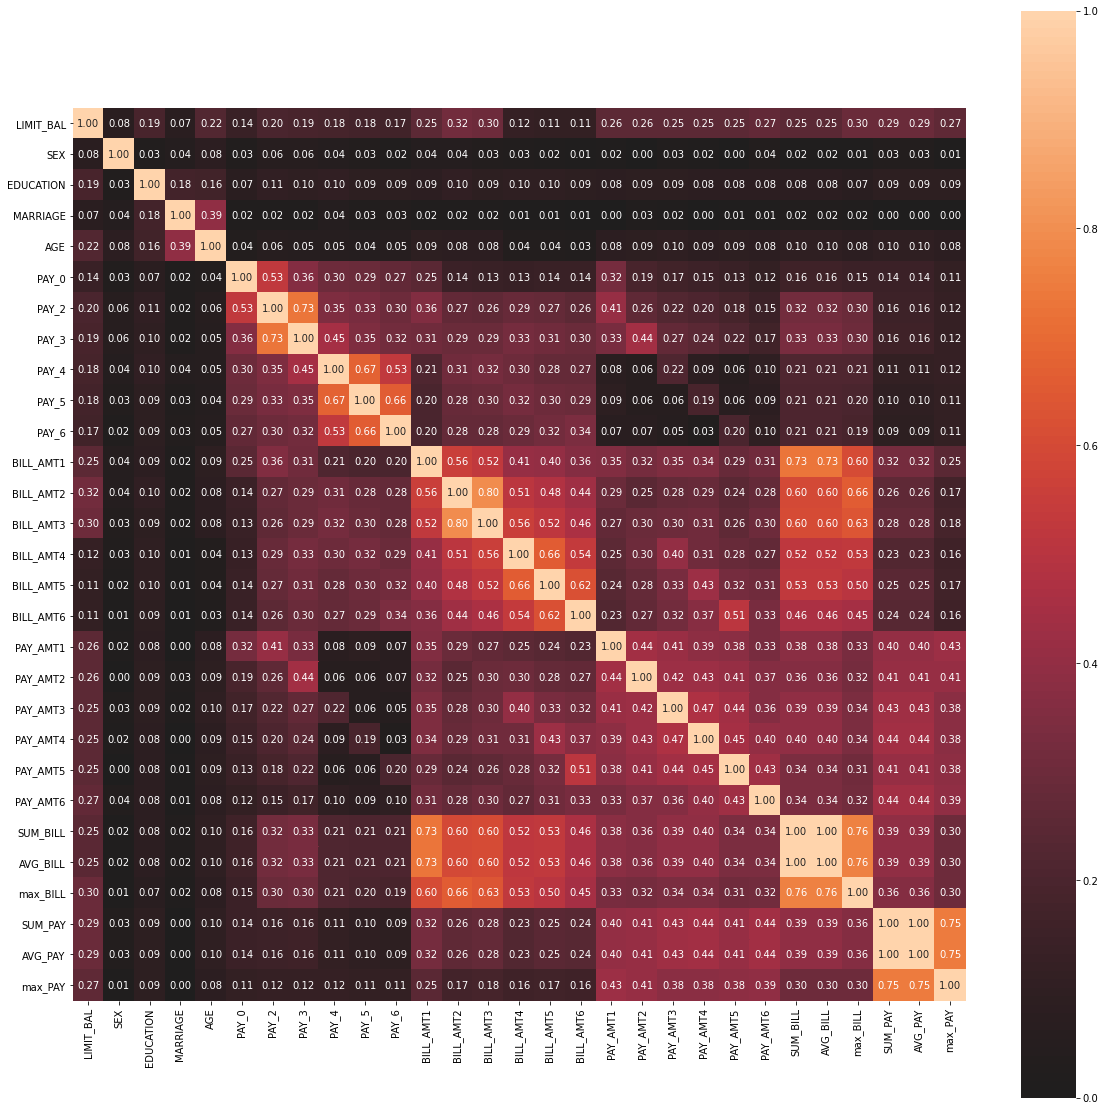

In [ ]:
z = nominal.associations(X_train_transf, nominal_columns='all', figsize=(20,20))

In [ ]:
z['corr'].to_csv('/content/drive/MyDrive/Curso_Logistica/crammer.csv')

In [ ]:
z['corr']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
LIMIT_BAL,1.000000,0.075917,0.191578,0.073093,0.224278,0.136043,0.201201,0.190847,0.183573,0.178610,0.170267,0.252610,0.315697,0.301911,0.118180,0.112288,0.109911,0.255284,0.255520,0.253421,0.251871,0.250348,0.266030,0.245465,0.245465,0.295092,0.292240,0.292240,0.265002
SEX,0.075917,1.000000,0.025153,0.039810,0.082419,0.029297,0.056282,0.057706,0.040918,0.034141,0.021697,0.041267,0.041258,0.031636,0.029959,0.022261,0.011502,0.016876,0.000000,0.030840,0.018195,0.004375,0.037931,0.015017,0.015017,0.013686,0.034160,0.034160,0.013533
EDUCATION,0.191578,0.025153,1.000000,0.176557,0.164247,0.071552,0.106755,0.097965,0.103321,0.086327,0.092800,0.085720,0.103870,0.093304,0.100548,0.095207,0.093535,0.084807,0.090413,0.085980,0.084937,0.080755,0.081723,0.081859,0.081859,0.067564,0.086662,0.086662,0.088998
MARRIAGE,0.073093,0.039810,0.176557,1.000000,0.391212,0.017389,0.018562,0.019224,0.043182,0.029277,0.032298,0.019730,0.018854,0.018764,0.010646,0.013230,0.006823,0.004324,0.025962,0.018058,0.000000,0.014235,0.008113,0.024291,0.024291,0.021622,0.003344,0.003344,0.000000
AGE,0.224278,0.082419,0.164247,0.391212,1.000000,0.038931,0.055307,0.054649,0.047949,0.043784,0.050462,0.089444,0.081318,0.081943,0.038769,0.036824,0.030038,0.084936,0.091268,0.099074,0.085708,0.089913,0.080436,0.096295,0.096295,0.079217,0.099045,0.099045,0.081533
PAY_0,0.136043,0.029297,0.071552,0.017389,0.038931,1.000000,0.530430,0.361144,0.303647,0.292763,0.268872,0.247712,0.140801,0.134698,0.131131,0.136487,0.137253,0.320329,0.194697,0.168955,0.150286,0.134655,0.115859,0.161275,0.161275,0.147765,0.144263,0.144263,0.113649
PAY_2,0.201201,0.056282,0.106755,0.018562,0.055307,0.530430,1.000000,0.733348,0.350220,0.328152,0.298062,0.359336,0.268946,0.258196,0.287548,0.274131,0.257663,0.413615,0.260138,0.223046,0.204516,0.182082,0.145132,0.317583,0.317583,0.296197,0.155866,0.155866,0.120841
PAY_3,0.190847,0.057706,0.097965,0.019224,0.054649,0.361144,0.733348,1.000000,0.447632,0.349572,0.317121,0.308414,0.291361,0.290053,0.325120,0.310791,0.295530,0.329269,0.441660,0.273286,0.242835,0.216725,0.170943,0.334979,0.334979,0.302672,0.163820,0.163820,0.122461
PAY_4,0.183573,0.040918,0.103321,0.043182,0.047949,0.303647,0.350220,0.447632,1.000000,0.672618,0.530071,0.214660,0.307331,0.323559,0.298929,0.280527,0.274864,0.075896,0.058559,0.217532,0.085463,0.055629,0.095147,0.213417,0.213417,0.213627,0.110619,0.110619,0.118525
PAY_5,0.178610,0.034141,0.086327,0.029277,0.043784,0.292763,0.328152,0.349572,0.672618,1.000000,0.658311,0.197787,0.281377,0.295963,0.323142,0.302495,0.293408,0.087461,0.059661,0.057643,0.192291,0.064525,0.085851,0.206662,0.206662,0.201712,0.099730,0.099730,0.111604


## Modelagem

### motivação - Modelo com dataset total

In [17]:
# Módulo statsmodels: https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [18]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


In [19]:
X_train_trat = sm.add_constant(X_train_trat, prepend=False)

In [20]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY,const
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165,1.0
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700,1.0
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168,1.0
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303,1.0
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413,1.0


In [ ]:
X_train_trat.dtypes

ID             int64
SAFRA          int64
LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1      int64
BILL_AMT2      int64
BILL_AMT3      int64
BILL_AMT4      int64
BILL_AMT5      int64
BILL_AMT6      int64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
SUM_BILL       int64
AVG_BILL     float64
max_BILL       int64
SUM_PAY        int64
AVG_PAY      float64
max_PAY        int64
const        float64
dtype: object

In [ ]:
variable_names = ['const','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']

In [ ]:
log_reg = sm.Logit(y_train, X_train_trat[variable_names]).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

In [ ]:
#print(log_reg.summary2())

In [ ]:
filter1 = ['LIMIT_BAL',  'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
        'BILL_AMT5', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


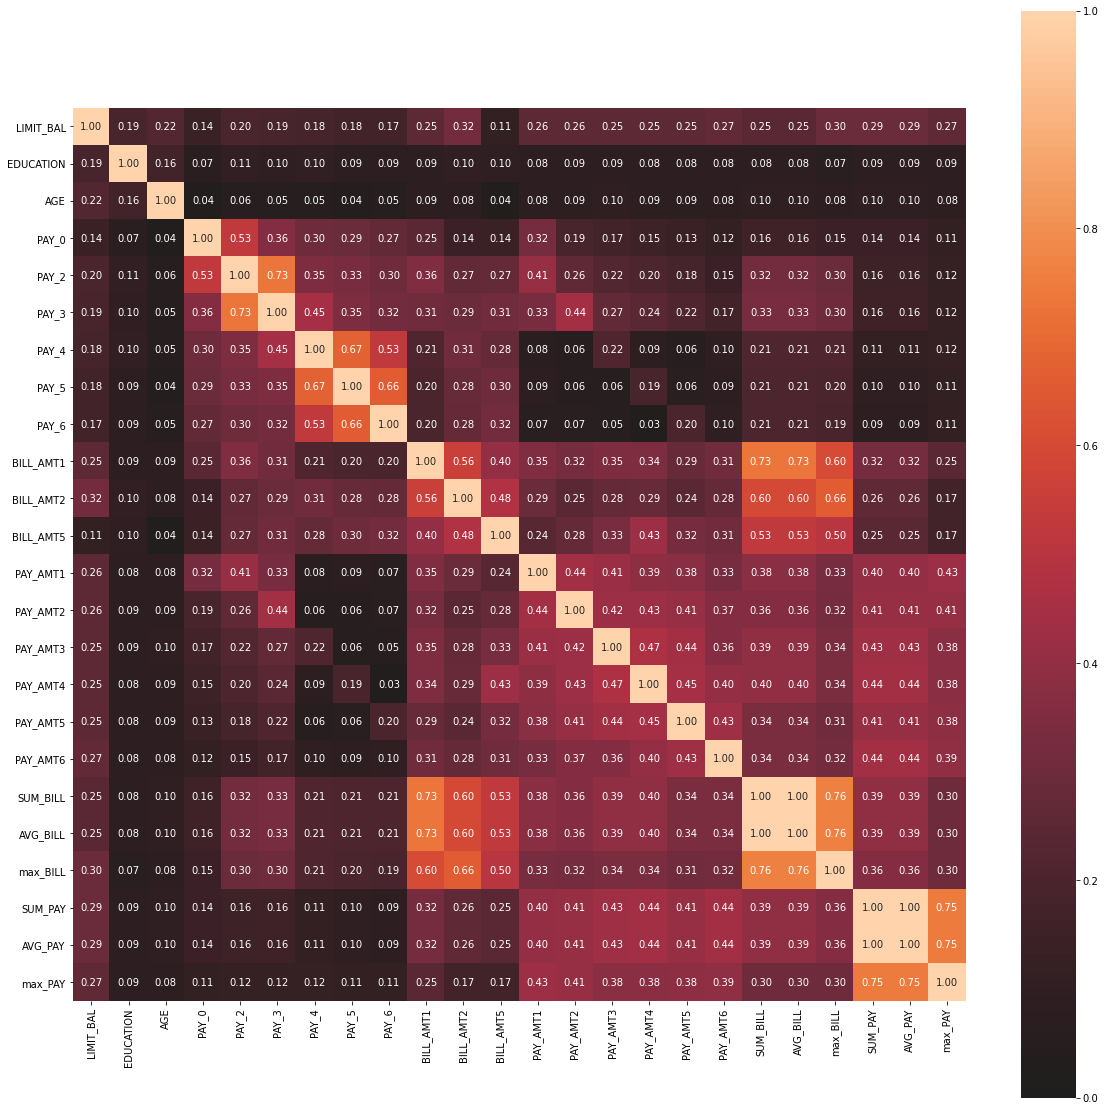

In [ ]:
from dython import nominal
z = nominal.associations(X_train_transf[filter1], nominal_columns='all', figsize=(20,20))


In [ ]:
z['corr'].to_csv('/content/drive/MyDrive/Curso_Logistica/crammer.csv')

In [21]:
finalistas = ['const','LIMIT_BAL',	'EDUCATION',	'AGE',	'PAY_0',	'PAY_2',	'PAY_5',	'BILL_AMT2',	'BILL_AMT5',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6',	'AVG_BILL',	'AVG_PAY']

In [22]:
log_reg = sm.Logit(y_train, X_train_trat[finalistas]).fit()

Optimization terminated successfully.
         Current function value: 0.472411
         Iterations 6


In [23]:
print(log_reg.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.124     
Dependent Variable: default          AIC:              13922.8885
Date:               2021-03-24 17:02 BIC:              14052.0137
No. Observations:   14700            Log-Likelihood:   -6944.4   
Df Model:           16               LL-Null:          -7923.7   
Df Residuals:       14683            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.0007    0.0965  -10.3668  0.0000  -1.1898  -0.8115
LIMIT_BAL    -0.0000    0.0000   -0.0868  0.9308  -0.0000   0.0000
EDUCATION    -0.1057    0.0299   -3.5350  0.0004  -0.1644  -0.0471
AGE           0.0085    0.0023

In [24]:
log_reg.params

const       -1.000656e+00
LIMIT_BAL   -1.920795e-08
EDUCATION   -1.057393e-01
AGE          8.511529e-03
PAY_0        5.461602e-01
PAY_2        9.291460e-02
PAY_5        1.338838e-01
BILL_AMT2   -8.522843e-08
BILL_AMT5    4.806591e-06
PAY_AMT1    -4.027688e-05
PAY_AMT2    -3.587918e-05
PAY_AMT3    -2.663146e-05
PAY_AMT4    -1.803909e-05
PAY_AMT5    -2.004822e-05
PAY_AMT6    -2.300518e-05
AVG_BILL    -2.797045e-06
AVG_PAY      2.547152e-06
dtype: float64